In [1]:
%load_ext autoreload
%autoreload 2

In [244]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt



In [17]:
sys.path.insert(0, '../')

In [218]:
from lv.fisher.fisher import Fisher

In [219]:
f=Fisher()
f.init()

https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g25v20modrt0b50000rs.asc.bz2
#8893 R=20000.03


In [224]:
pmt = [-2.0,8000,2.5,0.0,0.25]
f.testTemplate(pmt)

https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g25v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g20v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g30v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t7750g25v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t7750g20v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t7750g30v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/al

In [266]:
temp=f.temps[0]

In [267]:
temp._fields

('name', 'sst', 'wwm', 'ssm', 'skym', 'pmt', 'iwm')

In [230]:
np.random.seed(42)
rvarr = 200*(np.random.rand(5)-0.5)
nlarr = f.Util.makeNLArray(temp.sst,temp.skym)

In [231]:
nlarr

array([187.23134979,  93.38310984,  64.71958995,  41.28973569,
        18.34888923])

sigma_z=0.32


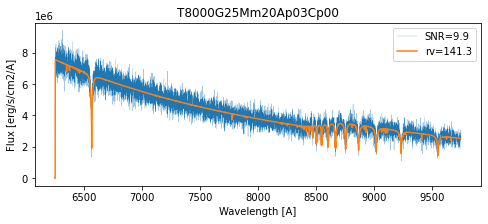

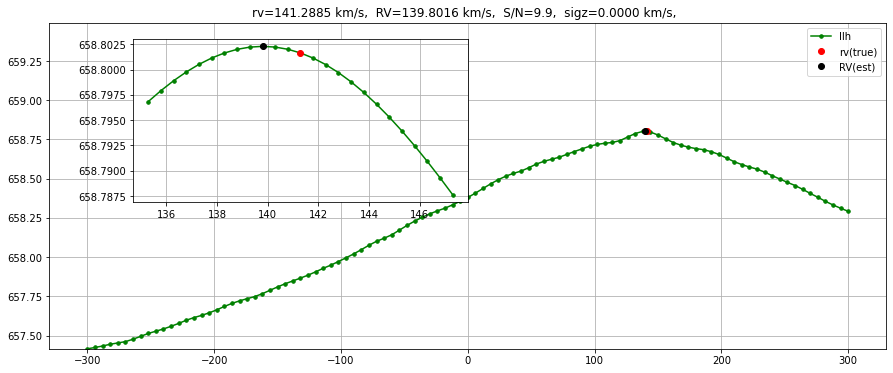

[[ 2.28912096e-06 -7.14162793e-07]
 [-7.14162793e-07  1.01274103e-01]]


In [316]:
rv  = 141.28845313 
NL  = 200

RV,F = f.testOneRV1(temp,rv,NL);
ff = sp.linalg.inv(np.array(F))
print(ff)

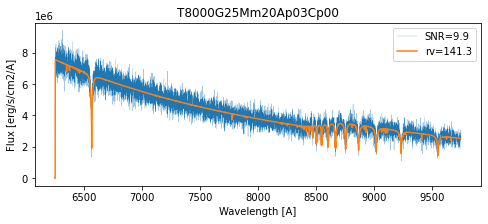

In [303]:
flux_m, obsflux_m, vmobs,SN = f.getObs_temp(temp, rv, NL, plot=1)


In [304]:
vmobs

array([6.40025241e+08, 6.40027760e+08, 6.40030962e+08, ...,
       1.02086905e+11, 1.02058655e+11, 1.02053357e+11])

In [305]:
fn = f.Doppler.get_LLH_fn(temp.sst, obsflux_m, vmobs)

In [307]:
RV = f.Doppler.getRV(fn)  


In [309]:
F  = f.Doppler.getFisherMatrix(RV,fn)


In [312]:
F

[[436849.8719314047, 3.080569628480589], [3.080569628480589, 9.87421437723297]]

In [ ]:
#--------------------------------------
# process one spectrum through several 
# SNRs and build a histogram of the 
# normalized velocity estimates
#--------------------------------------
N   = 250
NT  = 4
NV  = 5
#----------------------------
t0 = time.time()

for NL in nlarr:
    t1 = time.time()
    S  = getSigmaSim(NL,NV,N,NT,ss,T)
    Q  = mergeSims(S)
    showSigmaHisto(Q)
    t2 = time.time()
    print('    ..time: ',t2-t1,' sec')

getSigmaTemplate(rv,nlarr,ss,T)
t3 = time.time()  
print('Total time: ',t3-t0,' sec')